In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from shapely.geometry import Point, Polygon

In [3]:
cropland = gpd.read_file(r'./Urban/Living_England_Arable_(Phase_4)/Living_England_Habitat_Map_Phase_4___Natural_England.shp')

In [4]:
cropland.head()

,OBJECTID,ID,A_pred,A_prob,B_pred,B_prob,SrcCode,ImagesSpr,ImagesAut,SHAPE_Leng,SHAPE_Area,geometry
0,25,13000025,Arable and Horticultural,0.0,None,0.0,22,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,480.000000,4800.000000,"POLYGON ((92590.000 17220.000, 92570.000 17220..."
1,26,13000026,Arable and Horticultural,0.0,None,0.0,22,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,460.000000,4000.000000,"POLYGON ((92480.000 17110.000, 92480.000 17150..."
2,111,13000118,Arable and Horticultural,0.0,None,0.0,22,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,420.000000,8000.000000,"POLYGON ((92490.000 15960.000, 92490.000 15930..."
3,205,13000217,Arable and Horticultural,0.0,None,0.0,22,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,300.000000,2400.000000,"POLYGON ((93950.000 15410.000, 93940.000 15410..."
4,264,13000281,Arable and Horticultural,0.0,None,0.0,22,01/04/2021 - 30/04/2021,01/09/2020 - 30/09/2020,454.525142,3150.293438,"MULTIPOLYGON (((91045.799 16400.000, 91040.000..."


In [12]:
cropland = cropland.drop(cropland.columns[3:9], axis=1)
cropland

,OBJECTID,ID,A_pred,SHAPE_Leng,SHAPE_Area,geometry
0,25,13000025,Arable and Horticultural,480.000000,4800.000000,"POLYGON ((92590.000 17220.000, 92570.000 17220..."
1,26,13000026,Arable and Horticultural,460.000000,4000.000000,"POLYGON ((92480.000 17110.000, 92480.000 17150..."
2,111,13000118,Arable and Horticultural,420.000000,8000.000000,"POLYGON ((92490.000 15960.000, 92490.000 15930..."
3,205,13000217,Arable and Horticultural,300.000000,2400.000000,"POLYGON ((93950.000 15410.000, 93940.000 15410..."
4,264,13000281,Arable and Horticultural,454.525142,3150.293438,"MULTIPOLYGON (((91045.799 16400.000, 91040.000..."
...,...,...,...,...,...,...
1353745,6905030,7446574,Arable and Horticultural,1240.000000,24900.000000,"POLYGON ((518250.000 451920.000, 518250.000 45..."
1353746,6905031,7446589,Arable and Horticultural,1380.000000,28600.000000,"POLYGON ((518230.000 452160.000, 518230.000 45..."
1353747,6905032,7446591,Arable and Horticultural,720.000000,16700.000000,"POLYGON ((518360.000 452180.000, 518360.000 45..."
1353748,6905041,7447058,Arable and Horticultural,1540.000000,39200.000000,"POLYGON ((518220.000 451100.000, 518220.000 45..."


In [5]:
polygon = gpd.read_file(r'./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [6]:
england = pd.read_excel('England_class.xlsx')

In [7]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [8]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

In [10]:
england_poly_geo.head()

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."


In [24]:
cropland_england = gpd.sjoin(cropland, england_poly_geo, op='within')

In [47]:
cropland_lad = cropland_england.groupby(['LAD']).agg({'SHAPE_Area_left':'mean'}).reset_index()
cols = cropland_lad.columns.values
cols[0] = 'LAD'
cols[1] = 'area'
cropland_lad.columns = cols

In [48]:
cropland_lad

,LAD,area
0,E06000001,25107.496810
1,E06000002,21899.315180
2,E06000003,26529.622191
3,E06000004,25655.161650
4,E06000005,24557.680348
...,...,...
299,E09000027,5540.000000
300,E09000029,10340.000000
301,E09000031,5775.000000
302,E09000032,4200.000000


In [49]:
cropland_region = cropland_england.groupby(['Region']).agg({'SHAPE_Area_left':'mean'}).reset_index()
cols = cropland_region.columns.values
cols[0] = 'Region'
cols[1] = 'cropland_region'
cropland_region.columns = cols

In [72]:
cropland = pd.merge(cropland_lad, england_poly_geo, left_on='LAD', right_on='LAD', how='right')

In [73]:
cropland = pd.merge(cropland, cropland_region, left_on='Region', right_on='Region', how='left')

In [74]:
cropland

,LAD,area,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,cropland_region
0,E06000001,25107.496810,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",26440.239578
1,E06000002,21899.315180,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",26440.239578
2,E06000003,26529.622191,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",26440.239578
3,E06000004,25655.161650,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",26440.239578
4,E06000005,24557.680348,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",26440.239578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,E12000007,NaN,London,England,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,23349.418655
346,E12000008,NaN,South East,England,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,28652.081682
347,E12000009,NaN,South West,England,South West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,27129.762042
348,E13000001,NaN,Inner London,England,London,E13000001,Inner London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,23349.418655


In [75]:
cropland['area'].fillna(cropland['cropland_region'], inplace=True)

In [76]:
cropland = cropland.loc[:308]

In [77]:
cropland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 308
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   LAD              309 non-null    object  
 1   area             309 non-null    float64 
 2   LAD_Name         308 non-null    object  
 3   Country          309 non-null    object  
 4   Region           309 non-null    object  
 5   County_Code      309 non-null    object  
 6   County_Name      309 non-null    object  
 7   OBJECTID         309 non-null    float64 
 8   LAD21CD          309 non-null    object  
 9   LAD21NM          309 non-null    object  
 10  BNG_E            309 non-null    float64 
 11  BNG_N            309 non-null    float64 
 12  LONG             309 non-null    float64 
 13  LAT              309 non-null    float64 
 14  SHAPE_Leng       309 non-null    float64 
 15  SHAPE_Area       309 non-null    float64 
 16  geometry         309 non-null    geometry
 1

In [78]:
cropland['cropland_density'] = cropland['area']/cropland['SHAPE_Area']

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [79]:
cropland = gpd.GeoDataFrame(cropland, crs="EPSG:27700", geometry=cropland['geometry'])

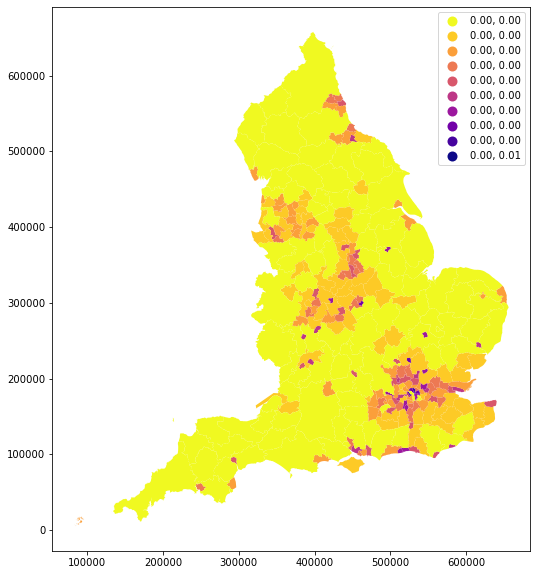

In [80]:
cropland.plot(column='cropland_density', cmap='plasma_r', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10));

In [81]:
cropland.to_csv(r'./OUTPUT/Cropland_Density.csv')

In [82]:
cropland

,LAD,area,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,cropland_region,cropland_density
0,E06000001,25107.496810,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53...",26440.239578,0.000255
1,E06000002,21899.315180,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52...",26440.239578,0.000401
2,E06000003,26529.622191,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52...",26440.239578,0.000105
3,E06000004,25655.161650,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52...",26440.239578,0.000122
4,E06000005,24557.680348,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52...",26440.239578,0.000124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,E09000029,10340.000000,Sutton,England,London,E13000002,Outer London,305.0,E09000029,Sutton,527357.0,163639.0,-0.17226,51.357552,39927.915712,4.384769e+07,"POLYGON ((527085.942 167617.691, 527087.729 16...",23349.418655,0.000236
305,E09000030,23349.418655,Tower Hamlets,England,London,E13000001,Inner London,306.0,E09000030,Tower Hamlets,536340.0,181452.0,-0.03647,51.515541,26818.136105,2.157691e+07,"POLYGON ((536776.386 184446.881, 536777.600 18...",23349.418655,0.001082
306,E09000031,5775.000000,Waltham Forest,England,London,E13000002,Outer London,307.0,E09000031,Waltham Forest,537328.0,190278.0,-0.01880,51.594608,33346.575271,3.881023e+07,"POLYGON ((537921.098 196048.201, 537947.499 19...",23349.418655,0.000149
307,E09000032,4200.000000,Wandsworth,England,London,E13000001,Inner London,308.0,E09000032,Wandsworth,525152.0,174138.0,-0.20021,51.452400,37444.099887,3.521603e+07,"POLYGON ((530059.620 177871.478, 530066.940 17...",23349.418655,0.000119
